In [1]:
import pandas as pd
import matplotlib.pyplot as plt

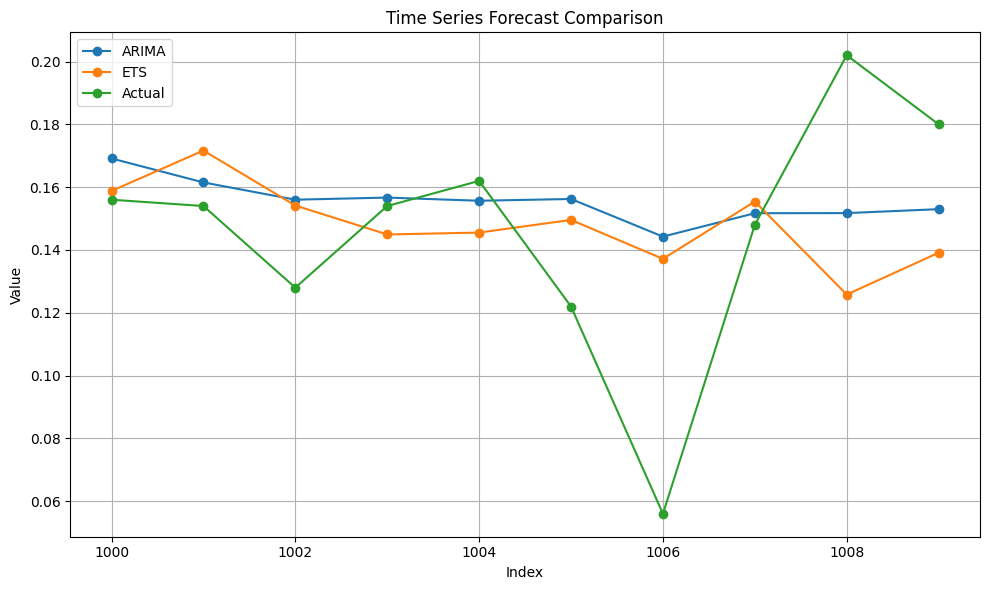

In [2]:
# Import the data
df = pd.read_csv('meta.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['index'], df['ARIMA'], label='ARIMA', marker='o')
plt.plot(df['index'], df['ETS'], label='ETS', marker='o')
plt.plot(df['index'], df['actual'], label='Actual', marker='o')

plt.title('Time Series Forecast Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()